In [27]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from collections import Counter

In [28]:
# Example dataset
data = {'feature1': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'feature2': [11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
        'class': [0, 0, 0, 0, 0, 1, 1, 1, 0, 0]}

df = pd.DataFrame(data)
X = df[['feature1', 'feature2']]
y = df['class']

org_shape = Counter(y)
print(f'Original dataset shape: {Counter(y)}')

Original dataset shape: Counter({0: 7, 1: 3})


In [29]:
# Assuming 'class' is the target variable and the rest are features
X = df.drop('class', axis=1)
y = df['class']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


<Axes: xlabel='class'>

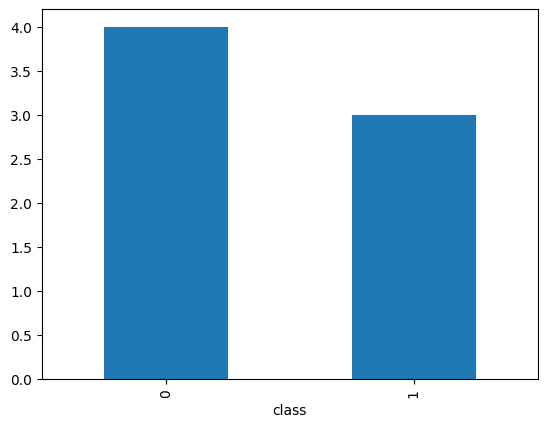

In [42]:
# plot balance dataset
y_train.value_counts().plot(kind='bar')

In [46]:

# Set k_neighbors to 1, the minimum possible value
smote = SMOTE(random_state=42, k_neighbors=1)
# smote = SMOTE(sampling_strategy=0.2, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print(f'Original dataset shape: {Counter(y_train)}')
print(f'After SMOTE > dataset shape: {Counter(y_train_resampled)}')

y = y_train_resampled
X = X_train_resampled
df['class'] = y
after_shape = Counter(y)

Original dataset shape: Counter({0: 4, 1: 3})
After SMOTE > dataset shape: Counter({0: 4, 1: 4})


After SMOTE > dataset shape: Counter({0: 4, 1: 4})


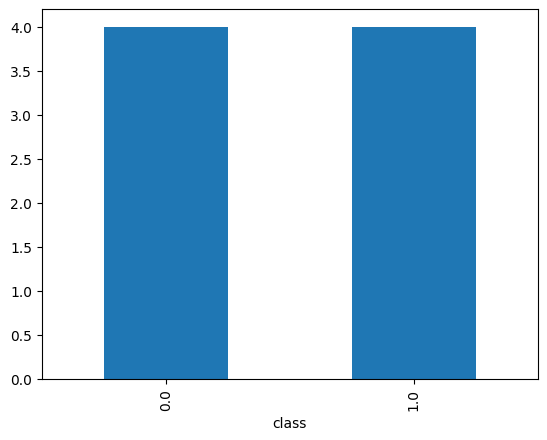

In [38]:
# plot balance dataset
df['class'].value_counts().plot(kind='bar')
print(f'After SMOTE > dataset shape: {Counter(y)}')

In [34]:
print(org_shape)
print(after_shape)


Counter({0: 7, 1: 3})
Counter({0: 5, 1: 5})
